In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
df = pd.read_csv("points_data.csv",index_col=0)

In [69]:
df.head()

,user,points,counts,activity,team
0,Mohammed Saqib,10,6.7,Outdoor Running_27th May,Couch Potato Lifters
1,Latika Pande,10,1.1,Outdoor Running_27th May,Couch Potato Lifters
2,RamKumar Gugamsetty,10,1.1,Outdoor Running_27th May,Couch Potato Lifters
3,SREEKARAN B,10,5.3,Outdoor Running_27th May,Couch Potato Lifters
4,Aishwarya,0,0.0,Outdoor Running_27th May,Couch Potato Lifters


In [70]:
df.isna().sum()

user        0
points      0
counts      0
activity    0
team        0
dtype: int64

In [71]:
df['activity_name'] = df['activity'].apply(lambda x: x.split("_")[0])

In [72]:
df['day'] = df['activity'].apply(lambda x: x.split("_")[1])

In [73]:
df.head()

,user,points,counts,activity,team,activity_name,day
0,Mohammed Saqib,10,6.7,Outdoor Running_27th May,Couch Potato Lifters,Outdoor Running,27th May
1,Latika Pande,10,1.1,Outdoor Running_27th May,Couch Potato Lifters,Outdoor Running,27th May
2,RamKumar Gugamsetty,10,1.1,Outdoor Running_27th May,Couch Potato Lifters,Outdoor Running,27th May
3,SREEKARAN B,10,5.3,Outdoor Running_27th May,Couch Potato Lifters,Outdoor Running,27th May
4,Aishwarya,0,0.0,Outdoor Running_27th May,Couch Potato Lifters,Outdoor Running,27th May


In [74]:
df.groupby("activity_name")['counts'].sum()

activity_name
Outdoor Cycling       2450.5
Outdoor Running        748.4
Steps Count        9704638.0
Name: counts, dtype: float64

In [75]:
df.to_excel("fitcdx_data.xlsx",index=False)

In [76]:
df['day'] = df['day'].str.replace('th','')

In [77]:
df['day'] = df['day'].str.replace('st','')

In [78]:
df['day'] = df['day'].str.replace('nd','')

In [79]:
df['day'] = df['day'].str.replace('rd','')

In [80]:
df['date'] = pd.to_datetime(df['day'],format='%d %B')

In [81]:
df.head()

,user,points,counts,activity,team,activity_name,day,date
0,Mohammed Saqib,10,6.7,Outdoor Running_27th May,Couch Potato Lifters,Outdoor Running,27 May,1900-05-27
1,Latika Pande,10,1.1,Outdoor Running_27th May,Couch Potato Lifters,Outdoor Running,27 May,1900-05-27
2,RamKumar Gugamsetty,10,1.1,Outdoor Running_27th May,Couch Potato Lifters,Outdoor Running,27 May,1900-05-27
3,SREEKARAN B,10,5.3,Outdoor Running_27th May,Couch Potato Lifters,Outdoor Running,27 May,1900-05-27
4,Aishwarya,0,0.0,Outdoor Running_27th May,Couch Potato Lifters,Outdoor Running,27 May,1900-05-27


In [82]:
df['date'] = df['date'].astype("str")

In [83]:
df['date'] = df['date'].str.replace('1900','2023')

In [84]:
df.head()

,user,points,counts,activity,team,activity_name,day,date
0,Mohammed Saqib,10,6.7,Outdoor Running_27th May,Couch Potato Lifters,Outdoor Running,27 May,2023-05-27
1,Latika Pande,10,1.1,Outdoor Running_27th May,Couch Potato Lifters,Outdoor Running,27 May,2023-05-27
2,RamKumar Gugamsetty,10,1.1,Outdoor Running_27th May,Couch Potato Lifters,Outdoor Running,27 May,2023-05-27
3,SREEKARAN B,10,5.3,Outdoor Running_27th May,Couch Potato Lifters,Outdoor Running,27 May,2023-05-27
4,Aishwarya,0,0.0,Outdoor Running_27th May,Couch Potato Lifters,Outdoor Running,27 May,2023-05-27


In [85]:
df.drop(["day","activity"],axis=1,inplace=True)

In [86]:
df.head()

,user,points,counts,team,activity_name,date
0,Mohammed Saqib,10,6.7,Couch Potato Lifters,Outdoor Running,2023-05-27
1,Latika Pande,10,1.1,Couch Potato Lifters,Outdoor Running,2023-05-27
2,RamKumar Gugamsetty,10,1.1,Couch Potato Lifters,Outdoor Running,2023-05-27
3,SREEKARAN B,10,5.3,Couch Potato Lifters,Outdoor Running,2023-05-27
4,Aishwarya,0,0.0,Couch Potato Lifters,Outdoor Running,2023-05-27


In [96]:
df['date'] = pd.to_datetime(df['date'])

In [122]:
new_df = df.groupby(["activity_name","date"])["counts"].sum().reset_index(name="counts")
new_df.head()

,activity_name,date,counts
0,Outdoor Cycling,2023-05-27,661.7
1,Outdoor Cycling,2023-05-28,697.4
2,Outdoor Cycling,2023-06-03,526.8
3,Outdoor Cycling,2023-06-04,564.6
4,Outdoor Running,2023-05-27,261.6


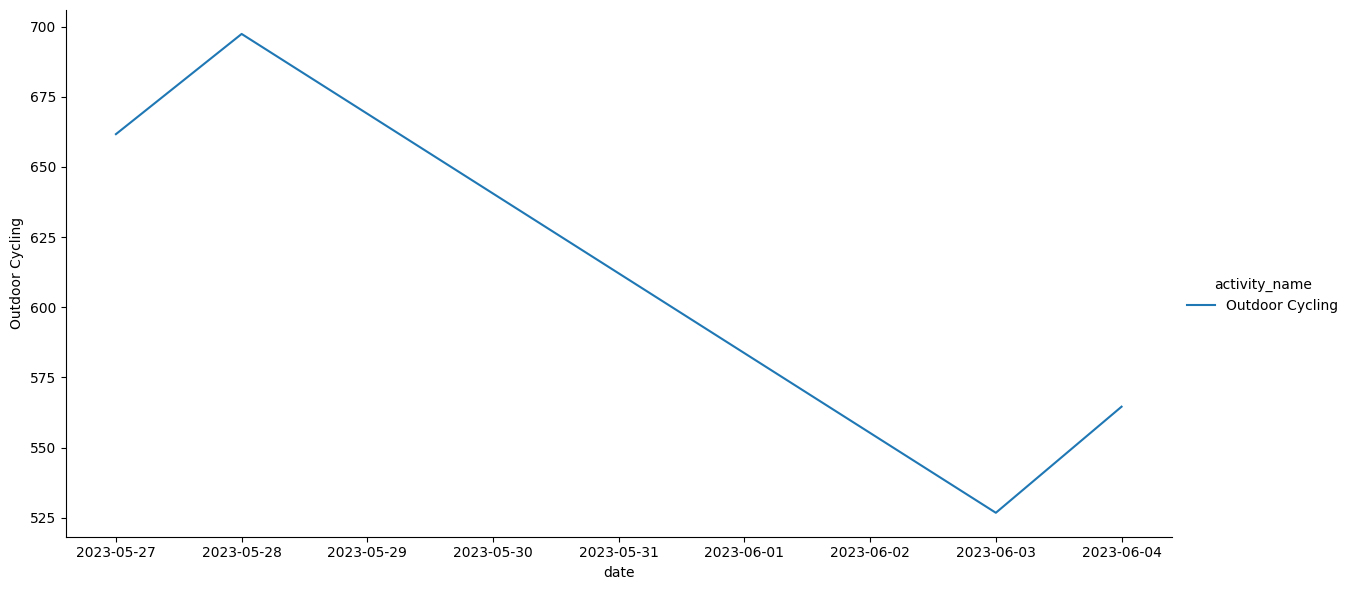

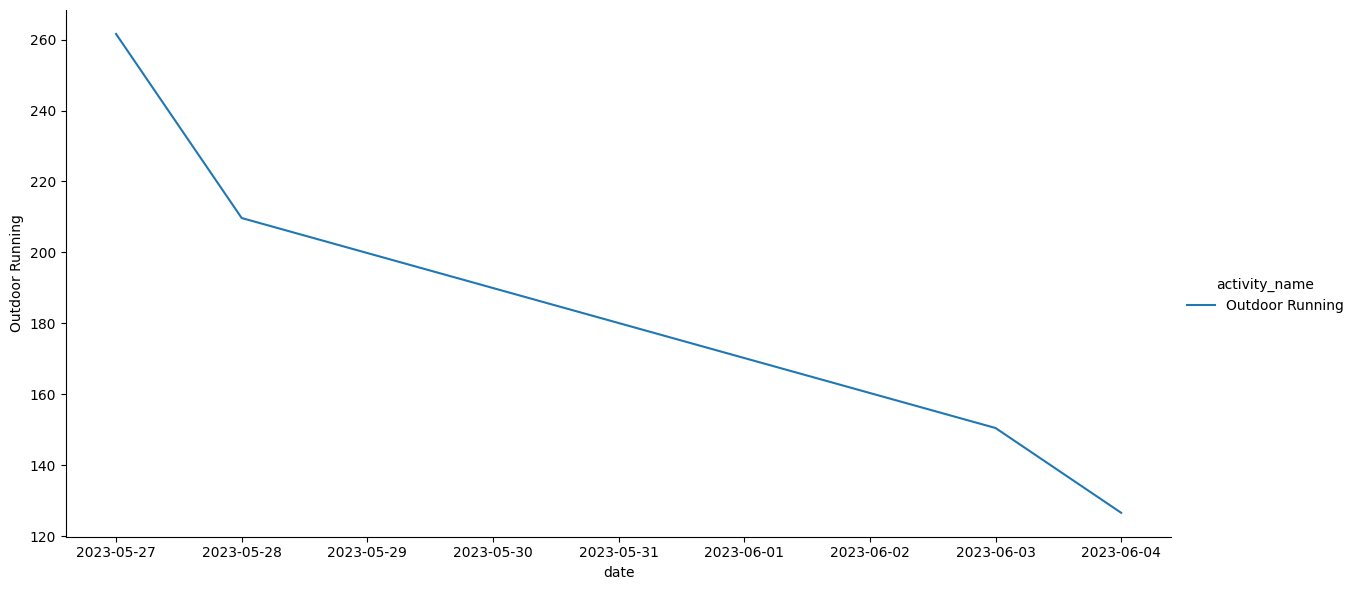

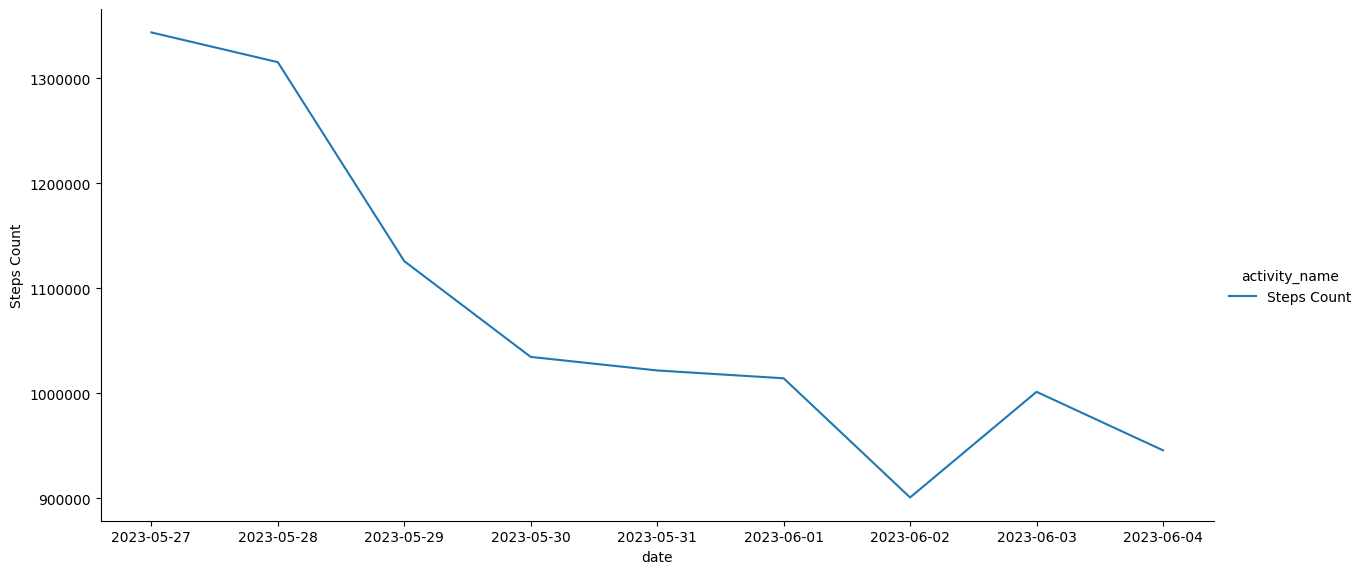

In [129]:
act = new_df['activity_name'].unique()

for i in act:
    g = sns.relplot(data=new_df[new_df['activity_name'] == i],x="date",y="counts",hue="activity_name",kind="line",height=6,aspect=2)
    plt.ticklabel_format(style='plain', axis='y')
    plt.ylabel(f"{i}")
plt.show()

In [140]:
steps_data = df[(df['activity_name'] == "Steps Count") & (df['team'] == 'Fitness Mantra @DLM')]

c:\Program Files\Python311\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  func(*plot_args, **plot_kwargs)


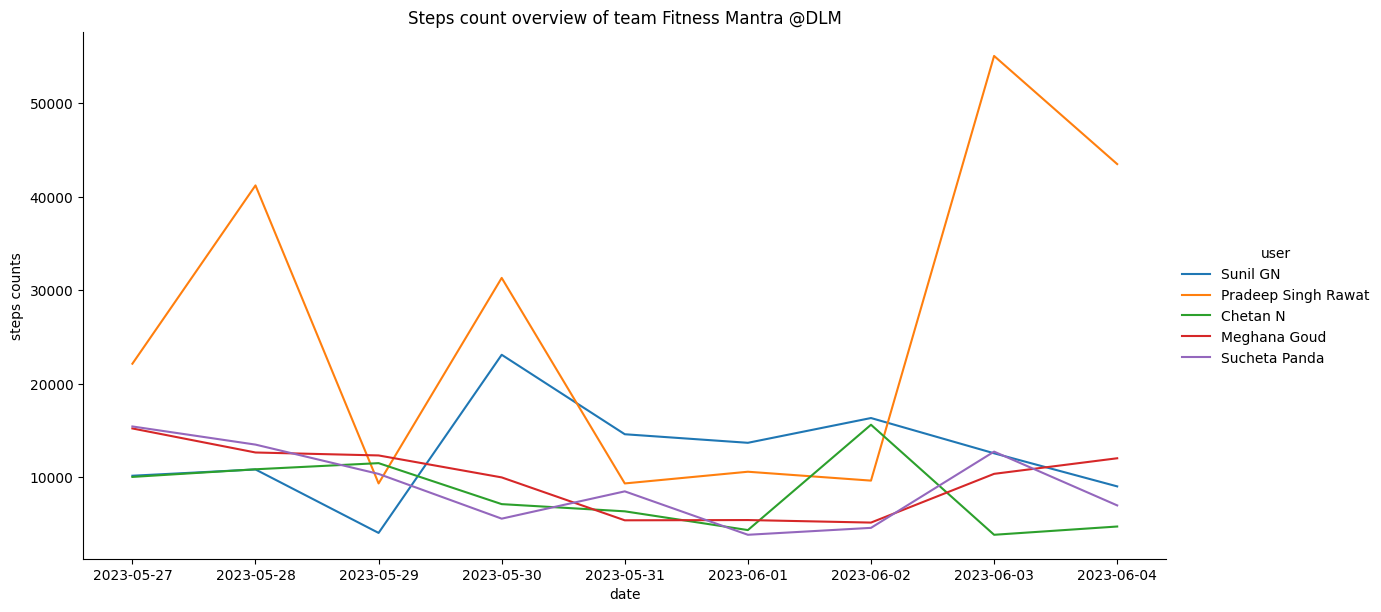

In [145]:
g = sns.relplot(data=steps_data,x="date",y="counts",hue="user",kind="line",ci='sd',height=6,aspect=2)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Steps count overview of team Fitness Mantra @DLM")
plt.ylabel("steps counts")
plt.show()

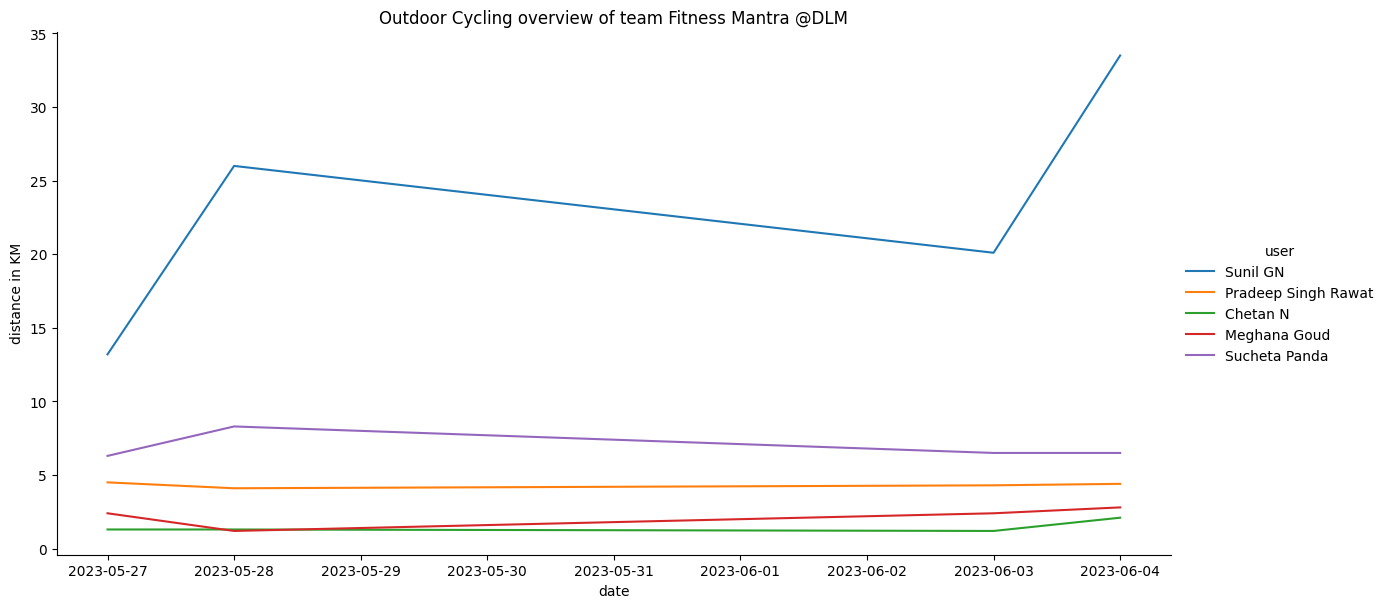

In [142]:
data = df[(df['activity_name'] == "Outdoor Cycling") & (df['team'] == 'Fitness Mantra @DLM')]
data.head()

g = sns.relplot(data=data,x="date",y="counts",hue="user",kind="line",height=6,aspect=2)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Outdoor Cycling overview of team Fitness Mantra @DLM")
plt.ylabel("distance in KM")
plt.show()

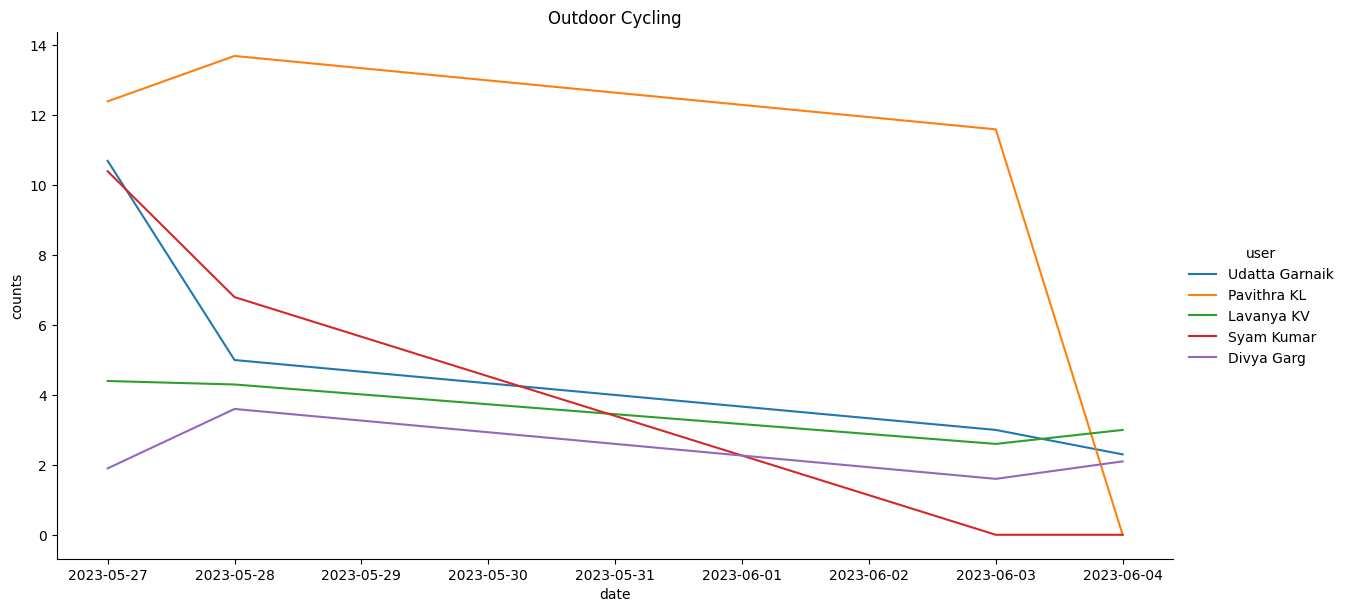

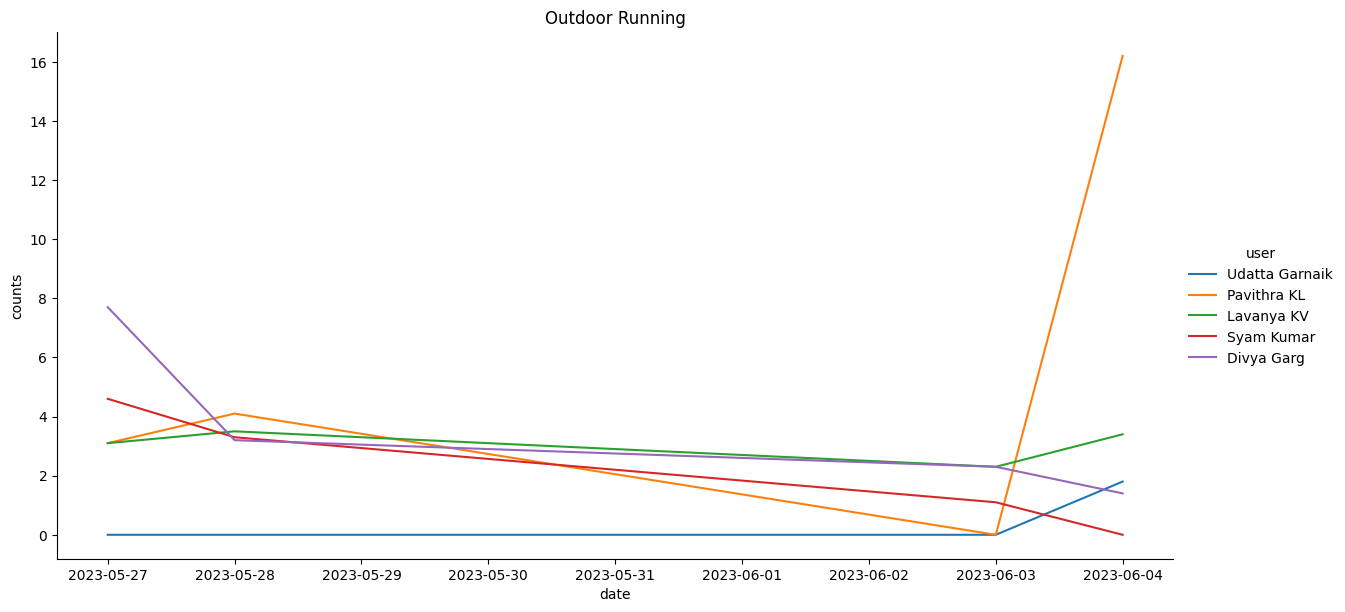

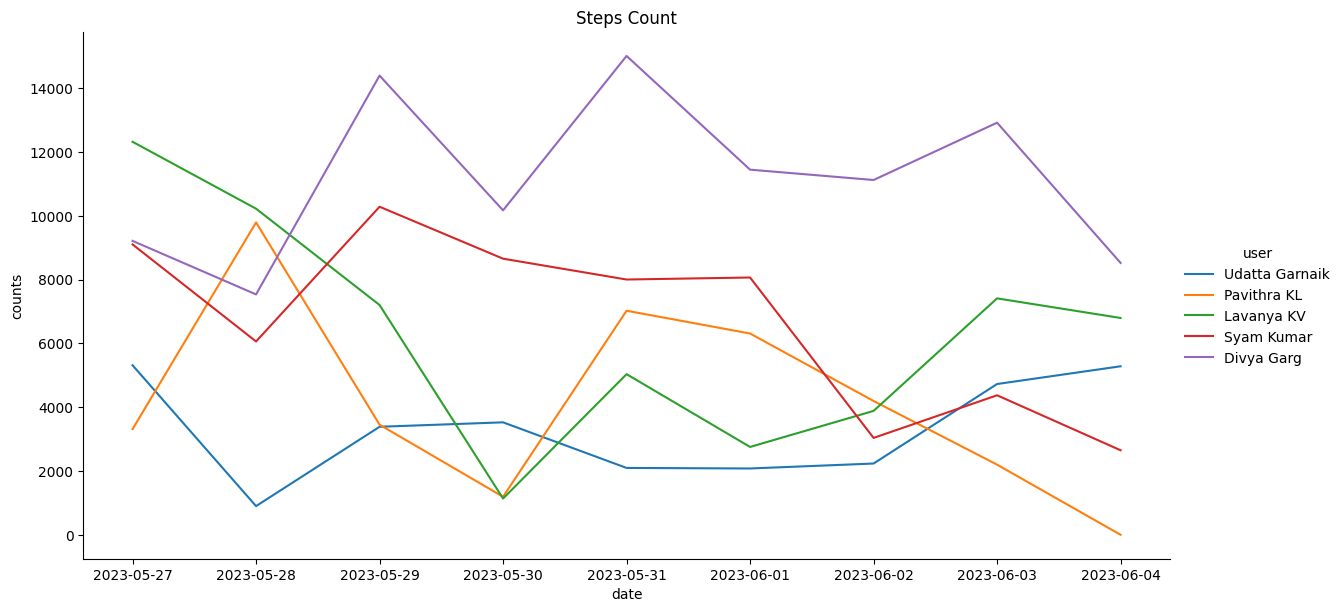

In [151]:
for i in act:

    steps_data = df[(df['activity_name'] == i) & (df['team'] == 'FrontRunners')]

    g = sns.relplot(data=steps_data,x="date",y="counts",hue="user",kind="line",height=6,aspect=2)
    plt.ticklabel_format(style='plain', axis='y')
    plt.title(i)
    plt.show()